In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from datetime import datetime
import seaborn as sns

%matplotlib inline
init_notebook_mode(connected = True)
import warnings; warnings.simplefilter('ignore')

In [2]:
import glob

pd.options.mode.chained_assignment = None

path = r'C:\\Users\Asus\Desktop\Bosch'
all_files = glob.iglob(path + "/*.csv")
li = []

for B in all_files:
    df = pd.read_csv(B, index_col=None, header=0, delimiter=';')
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

In [3]:
print(data)

           Id  Amount  Vol_total  Btw_pour  Pour_time  \
0     3302364      11       2695     37712      23825   
1     3302370      11       2736       278      25825   
2     3302387      11       7515       666       8814   
3     3302392       4         73       107       1125   
4     3302394       0       1163         2      10200   
...       ...     ...        ...       ...        ...   
8691  3452223       2       2856      2065      10200   
8692  3452387       1       1712      1751       7600   
8693  3452414       2       2852       176      11550   
8694  3452677       2       2850      2915      10550   
8695  3452703       1       1713       313       9975   

                         Time               Dev_id  Brand_id  CustomerId  \
0     2019-04-17 12:19:17.000  844e-0000-0f01-071a         1          78   
1     2019-04-17 12:24:22.000  844e-0000-0f01-071a         1          78   
2     2019-04-17 12:36:43.000  844e-0000-0f01-071a         1          78   
3     2019-

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8696 entries, 0 to 8695
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               8696 non-null   int64 
 1   Amount           8696 non-null   int64 
 2   Vol_total        8696 non-null   int64 
 3   Btw_pour         8696 non-null   int64 
 4   Pour_time        8696 non-null   int64 
 5   Time             8696 non-null   object
 6   Dev_id           8696 non-null   object
 7   Brand_id         8696 non-null   int64 
 8   CustomerId       8696 non-null   int64 
 9   LocationId       8696 non-null   int64 
 10  CreationDate     8696 non-null   object
 11  CL               8696 non-null   int64 
 12  ConvertedAmount  8696 non-null   int64 
 13  ConvertedCL      8696 non-null   int64 
 14  SelectedCL       8696 non-null   int64 
 15  TimeUTC          8696 non-null   object
 16  Flow_0           8696 non-null   object
 17  FlowRate         8696 non-null   

In [5]:
print(data.describe())

                 Id       Amount     Vol_total      Btw_pour     Pour_time  \
count  8.696000e+03  8696.000000   8696.000000   8696.000000   8696.000000   
mean   3.373698e+06     1.783349   2185.370170    533.729071  10480.002990   
std    4.220823e+04     1.488844   1035.228453   2936.606112   5890.020479   
min    3.302187e+06     0.000000      0.000000      0.000000     25.000000   
25%    3.337428e+06     1.000000   1711.000000      3.000000   6950.000000   
50%    3.373853e+06     2.000000   2851.000000     78.000000   9975.000000   
75%    3.407823e+06     2.000000   2854.000000    314.250000  11350.000000   
max    3.452825e+06    11.000000  15493.000000  61998.000000  60925.000000   

          Brand_id  CustomerId  LocationId           CL  ConvertedAmount  \
count  8696.000000      8696.0      8696.0  8696.000000      8696.000000   
mean      2.078312        78.0        96.0    34.445607         1.901564   
std       0.682119         0.0         0.0    21.739252         1.411

In [6]:
data['Date'] = pd.to_datetime(data.Time, format='%Y-%m-%d %H:%M:%S', errors='coerce')

data['Hour']=''
data['Day']= ''
data['Month'] = ''
data['Year'] = ''
for i in range(0,len(data)):
    data.loc[i,('Hour')]= data['Date'][i].hour
    data.loc[i,('Day')]= data['Date'][i].day
    data.loc[i,('Month')] = data['Date'][i].month
    data.loc[i,('Year')] = data['Date'][i].year
data

,Id,Amount,Vol_total,Btw_pour,Pour_time,Time,Dev_id,Brand_id,CustomerId,LocationId,...,Mode,TapId,StopCondition,Temp_after,Temp_before,Date,Hour,Day,Month,Year
0,3302364,11,2695,37712,23825,2019-04-17 12:19:17.000,844e-0000-0f01-071a,1,78,96,...,10,302,0,"2,200000048","20,10000038",2019-04-17 12:19:17,12,17,4,2019
1,3302370,11,2736,278,25825,2019-04-17 12:24:22.000,844e-0000-0f01-071a,1,78,96,...,10,302,0,"1,200000048","10,89999962",2019-04-17 12:24:22,12,17,4,2019
2,3302387,11,7515,666,8814,2019-04-17 12:36:43.000,844e-0000-0f01-071a,1,78,96,...,10,302,0,"0,899999976","12,60000038",2019-04-17 12:36:43,12,17,4,2019
3,3302392,4,73,107,1125,2019-04-17 12:38:32.000,844e-0000-0f01-071a,1,78,96,...,10,302,0,"3,900000095","4,199999809",2019-04-17 12:38:32,12,17,4,2019
4,3302394,0,1163,2,10200,2019-04-17 12:38:46.000,844e-0000-0f01-071a,1,78,96,...,0,302,0,"1,5","3,799999952",2019-04-17 12:38:46,12,17,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691,3452223,2,2856,2065,10200,2019-05-06 22:24:01.000,749c-0200-0b14-1404,3,78,96,...,2,226,0,"1,899999976","20,60000038",2019-05-06 22:24:01,22,6,5,2019
8692,3452387,1,1712,1751,7600,2019-05-06 22:53:21.000,749c-0200-0b14-1404,3,78,96,...,2,226,0,"2,700000048",21,2019-05-06 22:53:21,22,6,5,2019
8693,3452414,2,2852,176,11550,2019-05-06 22:56:30.000,749c-0200-0b14-1404,3,78,96,...,2,226,0,"1,299999952","13,39999962",2019-05-06 22:56:30,22,6,5,2019
8694,3452677,2,2850,2915,10550,2019-05-06 23:45:16.000,749c-0200-0b14-1404,3,78,96,...,2,226,0,"1,5","22,29999924",2019-05-06 23:45:16,23,6,5,2019


In [7]:
for col in data.columns:
  if len(data[col].unique()) == 1:
    data.drop([col], axis=1, inplace=True)

In [8]:
list(data.columns)

['Id',
 'Amount',
 'Vol_total',
 'Btw_pour',
 'Pour_time',
 'Time',
 'Dev_id',
 'Brand_id',
 'CreationDate',
 'CL',
 'ConvertedAmount',
 'ConvertedCL',
 'SelectedCL',
 'TimeUTC',
 'Flow_0',
 'FlowRate',
 'Mode',
 'TapId',
 'StopCondition',
 'Temp_after',
 'Temp_before',
 'Date',
 'Hour',
 'Day',
 'Month']

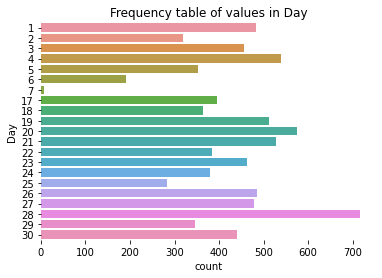

In [9]:
ax = sns.countplot(data=data,y='Day')
ax.set(title='Frequency table of values in Day')
sns.despine(left=True, bottom=True)

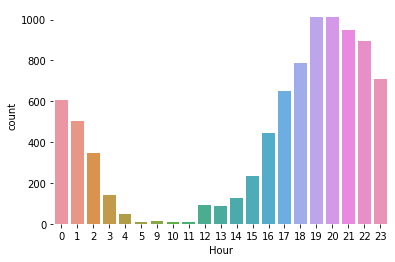

In [10]:
sns.countplot(data['Hour'])
ax.set(title='Frequency table of values in Hour')
sns.despine(left=True, bottom=True)

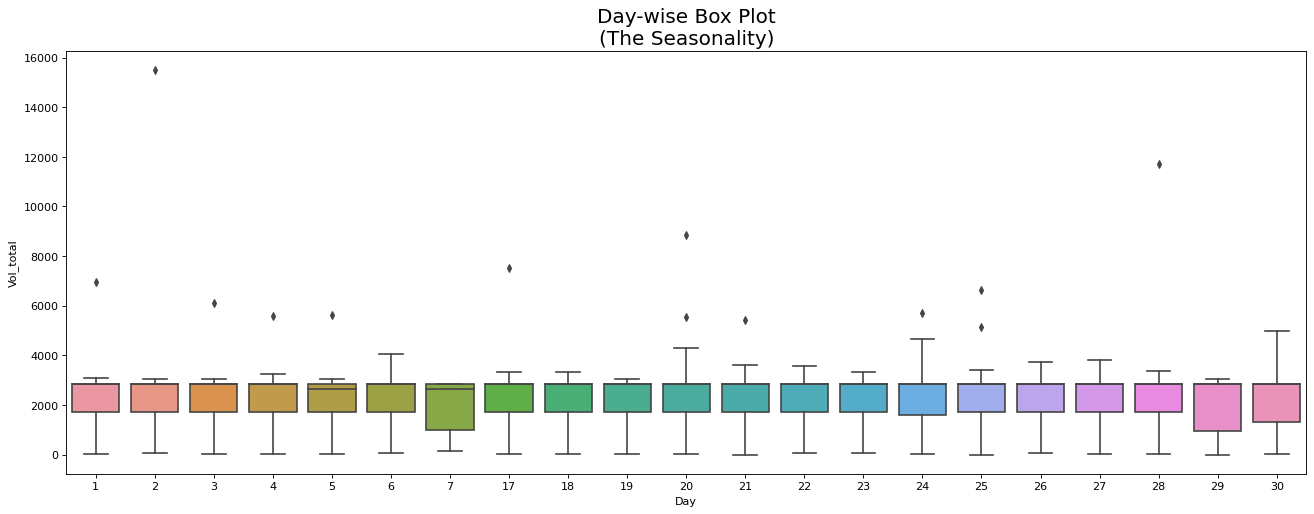

In [11]:
fig, axes = plt.subplots(1, figsize=(20,7), dpi= 80)
sns.boxplot(x='Day', y='Vol_total', data=data)
axes.set_title('Day-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

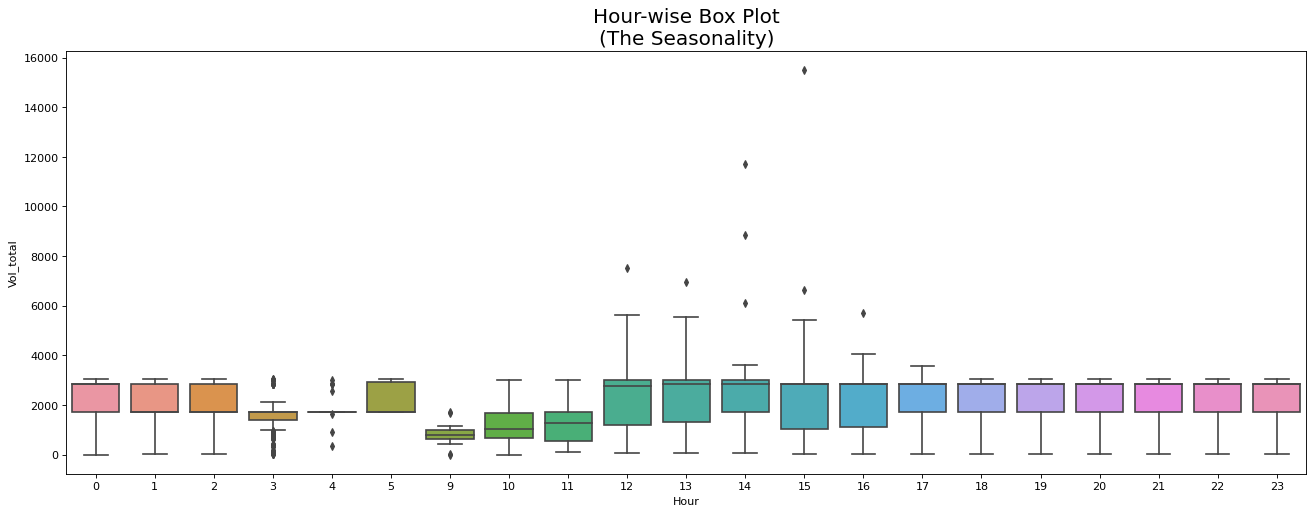

In [12]:
fig, axes = plt.subplots(1, figsize=(20,7), dpi= 80)
sns.boxplot(x='Hour', y='Vol_total', data=data)
axes.set_title('Hour-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [13]:
hour_sum = data.groupby(['Hour'])['Vol_total'].sum()
plot2 = [go.Scatter(
          x=hour_sum.index,
          y=hour_sum)] 
iplot(plot2)

In [14]:
day_sum = data.groupby(['Day'])['Vol_total'].sum()
plot2 = [go.Scatter(
          x=day_sum.index,
          y=day_sum)] 
iplot(plot2)

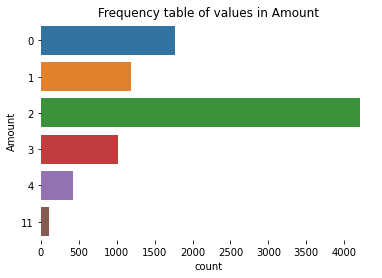

In [15]:
ax = sns.countplot(data=data,y='Amount')
ax.set(title='Frequency table of values in Amount')
sns.despine(left=True, bottom=True)

In [16]:
trace = go.Pie(labels=data['Amount'], values=data.groupby(['Day'])['Amount'].mean())
iplot([trace])

In [17]:
data = data[~(data == 11).any(axis=1)]

In [18]:
data

,Id,Amount,Vol_total,Btw_pour,Pour_time,Time,Dev_id,Brand_id,CreationDate,CL,...,FlowRate,Mode,TapId,StopCondition,Temp_after,Temp_before,Date,Hour,Day,Month
3,3302392,4,73,107,1125,2019-04-17 12:38:32.000,844e-0000-0f01-071a,1,17.04.2019 09:38,0,...,0,10,302,0,"3,900000095","4,199999809",2019-04-17 12:38:32,12,17,4
4,3302394,0,1163,2,10200,2019-04-17 12:38:46.000,844e-0000-0f01-071a,1,17.04.2019 09:38,0,...,"1,931545",0,302,0,"1,5","3,799999952",2019-04-17 12:38:46,12,17,4
5,3302395,0,1010,15,8850,2019-04-17 12:39:11.000,844e-0000-0f01-071a,1,17.04.2019 09:39,0,...,"1,922886",0,302,0,"1,200000048","3,200000048",2019-04-17 12:39:11,12,17,4
6,3302396,0,1262,17,11050,2019-04-17 12:39:40.000,844e-0000-0f01-071a,1,17.04.2019 09:39,0,...,"1,940144",0,302,0,"0,899999976","2,799999952",2019-04-17 12:39:40,12,17,4
7,3302452,2,2851,2544,24750,2019-04-17 13:22:32.000,844e-0000-0f01-071a,1,17.04.2019 10:24,50,...,"1,992557",0,302,0,3,18,2019-04-17 13:22:32,13,17,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691,3452223,2,2856,2065,10200,2019-05-06 22:24:01.000,749c-0200-0b14-1404,3,2019-05-06 19:24:02.080,50,...,"4,843481",2,226,0,"1,899999976","20,60000038",2019-05-06 22:24:01,22,6,5
8692,3452387,1,1712,1751,7600,2019-05-06 22:53:21.000,749c-0200-0b14-1404,3,6.05.2019 19:53,30,...,"3,859649",2,226,0,"2,700000048",21,2019-05-06 22:53:21,22,6,5
8693,3452414,2,2852,176,11550,2019-05-06 22:56:30.000,749c-0200-0b14-1404,3,6.05.2019 19:56,50,...,"4,271284",2,226,0,"1,299999952","13,39999962",2019-05-06 22:56:30,22,6,5
8694,3452677,2,2850,2915,10550,2019-05-06 23:45:16.000,749c-0200-0b14-1404,3,6.05.2019 20:45,50,...,"4,672819",2,226,0,"1,5","22,29999924",2019-05-06 23:45:16,23,6,5


In [19]:
trace = go.Pie(labels=data['Amount'], values=data.groupby(['Day'])['Amount'].mean())
iplot([trace])

In [20]:
data["Temp_after"]=data["Temp_after"].str.replace(",", ".").astype(float)
data["Temp_before"]=data["Temp_before"].str.replace(",", ".").astype(float)
print(data.dtypes)

Id                          int64
Amount                      int64
Vol_total                   int64
Btw_pour                    int64
Pour_time                   int64
Time                       object
Dev_id                     object
Brand_id                    int64
CreationDate               object
CL                          int64
ConvertedAmount             int64
ConvertedCL                 int64
SelectedCL                  int64
TimeUTC                    object
Flow_0                     object
FlowRate                   object
Mode                        int64
TapId                       int64
StopCondition               int64
Temp_after                float64
Temp_before               float64
Date               datetime64[ns]
Hour                       object
Day                        object
Month                      object
dtype: object


In [21]:
data['Temp_Changes'] = data['Temp_before'] - data['Temp_after']
data

,Id,Amount,Vol_total,Btw_pour,Pour_time,Time,Dev_id,Brand_id,CreationDate,CL,...,Mode,TapId,StopCondition,Temp_after,Temp_before,Date,Hour,Day,Month,Temp_Changes
3,3302392,4,73,107,1125,2019-04-17 12:38:32.000,844e-0000-0f01-071a,1,17.04.2019 09:38,0,...,10,302,0,3.9,4.200000,2019-04-17 12:38:32,12,17,4,0.300000
4,3302394,0,1163,2,10200,2019-04-17 12:38:46.000,844e-0000-0f01-071a,1,17.04.2019 09:38,0,...,0,302,0,1.5,3.800000,2019-04-17 12:38:46,12,17,4,2.300000
5,3302395,0,1010,15,8850,2019-04-17 12:39:11.000,844e-0000-0f01-071a,1,17.04.2019 09:39,0,...,0,302,0,1.2,3.200000,2019-04-17 12:39:11,12,17,4,2.000000
6,3302396,0,1262,17,11050,2019-04-17 12:39:40.000,844e-0000-0f01-071a,1,17.04.2019 09:39,0,...,0,302,0,0.9,2.800000,2019-04-17 12:39:40,12,17,4,1.900000
7,3302452,2,2851,2544,24750,2019-04-17 13:22:32.000,844e-0000-0f01-071a,1,17.04.2019 10:24,50,...,0,302,0,3.0,18.000000,2019-04-17 13:22:32,13,17,4,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691,3452223,2,2856,2065,10200,2019-05-06 22:24:01.000,749c-0200-0b14-1404,3,2019-05-06 19:24:02.080,50,...,2,226,0,1.9,20.600000,2019-05-06 22:24:01,22,6,5,18.700000
8692,3452387,1,1712,1751,7600,2019-05-06 22:53:21.000,749c-0200-0b14-1404,3,6.05.2019 19:53,30,...,2,226,0,2.7,21.000000,2019-05-06 22:53:21,22,6,5,18.300000
8693,3452414,2,2852,176,11550,2019-05-06 22:56:30.000,749c-0200-0b14-1404,3,6.05.2019 19:56,50,...,2,226,0,1.3,13.400000,2019-05-06 22:56:30,22,6,5,12.100000
8694,3452677,2,2850,2915,10550,2019-05-06 23:45:16.000,749c-0200-0b14-1404,3,6.05.2019 20:45,50,...,2,226,0,1.5,22.299999,2019-05-06 23:45:16,23,6,5,20.799999


In [22]:
print("Temp_after min: ", data['Temp_after'].min())
print("Temp_after max: ", data['Temp_after'].max())
print("Temp_after mean: ",data['Temp_after'].mean())
print("Temp_before min: ",data['Temp_before'].min())
print("Temp_before max: ",data['Temp_before'].max())
print("Temp_before mean: ",data['Temp_before'].mean())
print("Temp_Changes min: ",data['Temp_Changes'].min())
print("Temp_Changes max: ",data['Temp_Changes'].max())
print("Temp_Changes mean: ",data['Temp_Changes'].mean())

Temp_after min:  0.300000012
Temp_after max:  22.20000076
Temp_after mean:  2.6538065094267975
Temp_before min:  0.400000006
Temp_before max:  27.79999924
Temp_before mean:  7.448079180472241
Temp_Changes min:  -4.099999904000001
Temp_Changes max:  25.199999334999998
Temp_Changes mean:  4.794272671045444


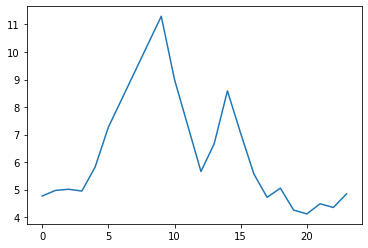

In [23]:
plt.plot(data.groupby(['Hour'])['Temp_Changes'].mean())

In [24]:
trace = go.Pie(labels=data['Amount'], values=data.groupby(['Hour'])['Amount'].mean())
iplot([trace])

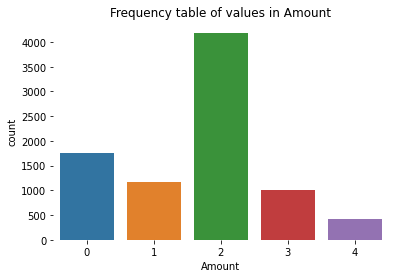

In [25]:
ax = sns.countplot(data['Amount'])
ax.set(title='Frequency table of values in Amount')
sns.despine(left=True, bottom=True)

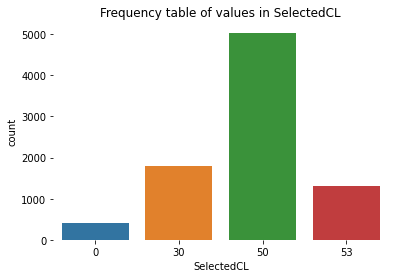

In [26]:
ax = sns.countplot(data['SelectedCL'])
ax.set(title='Frequency table of values in SelectedCL')
sns.despine(left=True, bottom=True)

In [27]:
trace = go.Pie(labels=data['SelectedCL'], values=data.groupby(['Day'])['SelectedCL'].mean())
iplot([trace])

In [28]:
comparison_column = np.where(data["Amount"] == data["ConvertedAmount"], True, False)
data["Equal"] = comparison_column
data

,Id,Amount,Vol_total,Btw_pour,Pour_time,Time,Dev_id,Brand_id,CreationDate,CL,...,TapId,StopCondition,Temp_after,Temp_before,Date,Hour,Day,Month,Temp_Changes,Equal
3,3302392,4,73,107,1125,2019-04-17 12:38:32.000,844e-0000-0f01-071a,1,17.04.2019 09:38,0,...,302,0,3.9,4.200000,2019-04-17 12:38:32,12,17,4,0.300000,True
4,3302394,0,1163,2,10200,2019-04-17 12:38:46.000,844e-0000-0f01-071a,1,17.04.2019 09:38,0,...,302,0,1.5,3.800000,2019-04-17 12:38:46,12,17,4,2.300000,True
5,3302395,0,1010,15,8850,2019-04-17 12:39:11.000,844e-0000-0f01-071a,1,17.04.2019 09:39,0,...,302,0,1.2,3.200000,2019-04-17 12:39:11,12,17,4,2.000000,True
6,3302396,0,1262,17,11050,2019-04-17 12:39:40.000,844e-0000-0f01-071a,1,17.04.2019 09:39,0,...,302,0,0.9,2.800000,2019-04-17 12:39:40,12,17,4,1.900000,True
7,3302452,2,2851,2544,24750,2019-04-17 13:22:32.000,844e-0000-0f01-071a,1,17.04.2019 10:24,50,...,302,0,3.0,18.000000,2019-04-17 13:22:32,13,17,4,15.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691,3452223,2,2856,2065,10200,2019-05-06 22:24:01.000,749c-0200-0b14-1404,3,2019-05-06 19:24:02.080,50,...,226,0,1.9,20.600000,2019-05-06 22:24:01,22,6,5,18.700000,True
8692,3452387,1,1712,1751,7600,2019-05-06 22:53:21.000,749c-0200-0b14-1404,3,6.05.2019 19:53,30,...,226,0,2.7,21.000000,2019-05-06 22:53:21,22,6,5,18.300000,True
8693,3452414,2,2852,176,11550,2019-05-06 22:56:30.000,749c-0200-0b14-1404,3,6.05.2019 19:56,50,...,226,0,1.3,13.400000,2019-05-06 22:56:30,22,6,5,12.100000,True
8694,3452677,2,2850,2915,10550,2019-05-06 23:45:16.000,749c-0200-0b14-1404,3,6.05.2019 20:45,50,...,226,0,1.5,22.299999,2019-05-06 23:45:16,23,6,5,20.799999,True


In [29]:
if False in list(data["Equal"]):
    print("There is a change of choice in Amount")
else:
    print("They are all equal")

There is a change of choice in Amount


In [30]:
data.loc[(data["Amount"] == 0) & (data["ConvertedAmount"] != 0)]

,Id,Amount,Vol_total,Btw_pour,Pour_time,Time,Dev_id,Brand_id,CreationDate,CL,...,TapId,StopCondition,Temp_after,Temp_before,Date,Hour,Day,Month,Temp_Changes,Equal
80,3307963,0,2622,2,11875,2019-04-17 22:48:16.000,844e-0000-0f01-071a,1,17.04.2019 19:48,0,...,302,0,0.3,1.700000,2019-04-17 22:48:16,22,17,4,1.400000,False
81,3307965,0,1932,15,9825,2019-04-17 22:48:42.000,844e-0000-0f01-071a,1,17.04.2019 19:48,0,...,302,0,1.0,3.700000,2019-04-17 22:48:42,22,17,4,2.700000,False
98,3310452,0,1879,1251,16175,2019-04-18 17:50:24.000,844e-0000-0f01-071a,1,18.04.2019 14:50,0,...,302,0,4.2,19.299999,2019-04-18 17:50:24,17,18,4,15.099999,False
164,3316260,0,2622,48,23025,2019-04-19 18:04:22.000,844e-0000-0f01-071a,1,19.04.2019 15:04,0,...,302,0,0.8,3.900000,2019-04-19 18:04:22,18,19,4,3.100000,False
178,3317054,0,1631,1,14350,2019-04-19 19:25:19.000,844e-0000-0f01-071a,1,19.04.2019 16:25,0,...,302,0,0.9,0.900000,2019-04-19 19:25:19,19,19,4,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,3442837,0,1697,1,13200,2019-05-05 10:07:58.000,749c-0200-0b14-1404,3,5.05.2019 07:08,0,...,226,0,1.8,6.400000,2019-05-05 10:07:58,10,5,5,4.600000,False
8608,3443902,0,1668,873,9850,2019-05-05 10:22:42.000,749c-0200-0b14-1404,3,5.05.2019 12:50,0,...,226,0,3.6,18.200001,2019-05-05 10:22:42,10,5,5,14.600001,False
8612,3445075,0,1672,84,9825,2019-05-05 17:37:26.000,749c-0200-0b14-1404,3,5.05.2019 14:37,0,...,226,0,2.0,8.700000,2019-05-05 17:37:26,17,5,5,6.700000,False
8622,3446198,0,2777,14,10750,2019-05-05 19:07:03.000,749c-0200-0b14-1404,3,5.05.2019 16:07,0,...,226,0,2.3,6.900000,2019-05-05 19:07:03,19,5,5,4.600000,False


In [31]:
data["Amount"] = np.where(data["Amount"] == 0, data["ConvertedAmount"], data.Amount)

In [32]:
data

,Id,Amount,Vol_total,Btw_pour,Pour_time,Time,Dev_id,Brand_id,CreationDate,CL,...,TapId,StopCondition,Temp_after,Temp_before,Date,Hour,Day,Month,Temp_Changes,Equal
3,3302392,4,73,107,1125,2019-04-17 12:38:32.000,844e-0000-0f01-071a,1,17.04.2019 09:38,0,...,302,0,3.9,4.200000,2019-04-17 12:38:32,12,17,4,0.300000,True
4,3302394,0,1163,2,10200,2019-04-17 12:38:46.000,844e-0000-0f01-071a,1,17.04.2019 09:38,0,...,302,0,1.5,3.800000,2019-04-17 12:38:46,12,17,4,2.300000,True
5,3302395,0,1010,15,8850,2019-04-17 12:39:11.000,844e-0000-0f01-071a,1,17.04.2019 09:39,0,...,302,0,1.2,3.200000,2019-04-17 12:39:11,12,17,4,2.000000,True
6,3302396,0,1262,17,11050,2019-04-17 12:39:40.000,844e-0000-0f01-071a,1,17.04.2019 09:39,0,...,302,0,0.9,2.800000,2019-04-17 12:39:40,12,17,4,1.900000,True
7,3302452,2,2851,2544,24750,2019-04-17 13:22:32.000,844e-0000-0f01-071a,1,17.04.2019 10:24,50,...,302,0,3.0,18.000000,2019-04-17 13:22:32,13,17,4,15.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691,3452223,2,2856,2065,10200,2019-05-06 22:24:01.000,749c-0200-0b14-1404,3,2019-05-06 19:24:02.080,50,...,226,0,1.9,20.600000,2019-05-06 22:24:01,22,6,5,18.700000,True
8692,3452387,1,1712,1751,7600,2019-05-06 22:53:21.000,749c-0200-0b14-1404,3,6.05.2019 19:53,30,...,226,0,2.7,21.000000,2019-05-06 22:53:21,22,6,5,18.300000,True
8693,3452414,2,2852,176,11550,2019-05-06 22:56:30.000,749c-0200-0b14-1404,3,6.05.2019 19:56,50,...,226,0,1.3,13.400000,2019-05-06 22:56:30,22,6,5,12.100000,True
8694,3452677,2,2850,2915,10550,2019-05-06 23:45:16.000,749c-0200-0b14-1404,3,6.05.2019 20:45,50,...,226,0,1.5,22.299999,2019-05-06 23:45:16,23,6,5,20.799999,True


In [33]:
data.loc[data.Id == 3452661]

,Id,Amount,Vol_total,Btw_pour,Pour_time,Time,Dev_id,Brand_id,CreationDate,CL,...,TapId,StopCondition,Temp_after,Temp_before,Date,Hour,Day,Month,Temp_Changes,Equal
1707,3452661,2,2480,1,17800,2019-05-06 23:39:44.000,844e-0000-0f01-071a,1,6.05.2019 20:39,0,...,302,0,0.9,2.3,2019-05-06 23:39:44,23,6,5,1.4,False


In [34]:
del data['Equal']

In [35]:
data.loc[(data['Amount'] == 0) & (data['ConvertedAmount'] != 0)]

,Id,Amount,Vol_total,Btw_pour,Pour_time,Time,Dev_id,Brand_id,CreationDate,CL,...,Mode,TapId,StopCondition,Temp_after,Temp_before,Date,Hour,Day,Month,Temp_Changes


In [36]:
trace = go.Pie(labels=data['Amount'], values=data.groupby(['Hour'])['Amount'].mean())
iplot([trace])

In [37]:
trace = go.Pie(labels=data['Amount'], values=data.groupby(['Day'])['Amount'].mean())
iplot([trace])

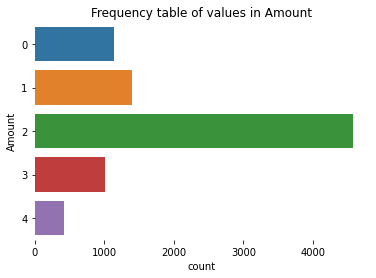

In [38]:
ax = sns.countplot(data=data,y='Amount')
ax.set(title='Frequency table of values in Amount')
sns.despine(left=True, bottom=True)

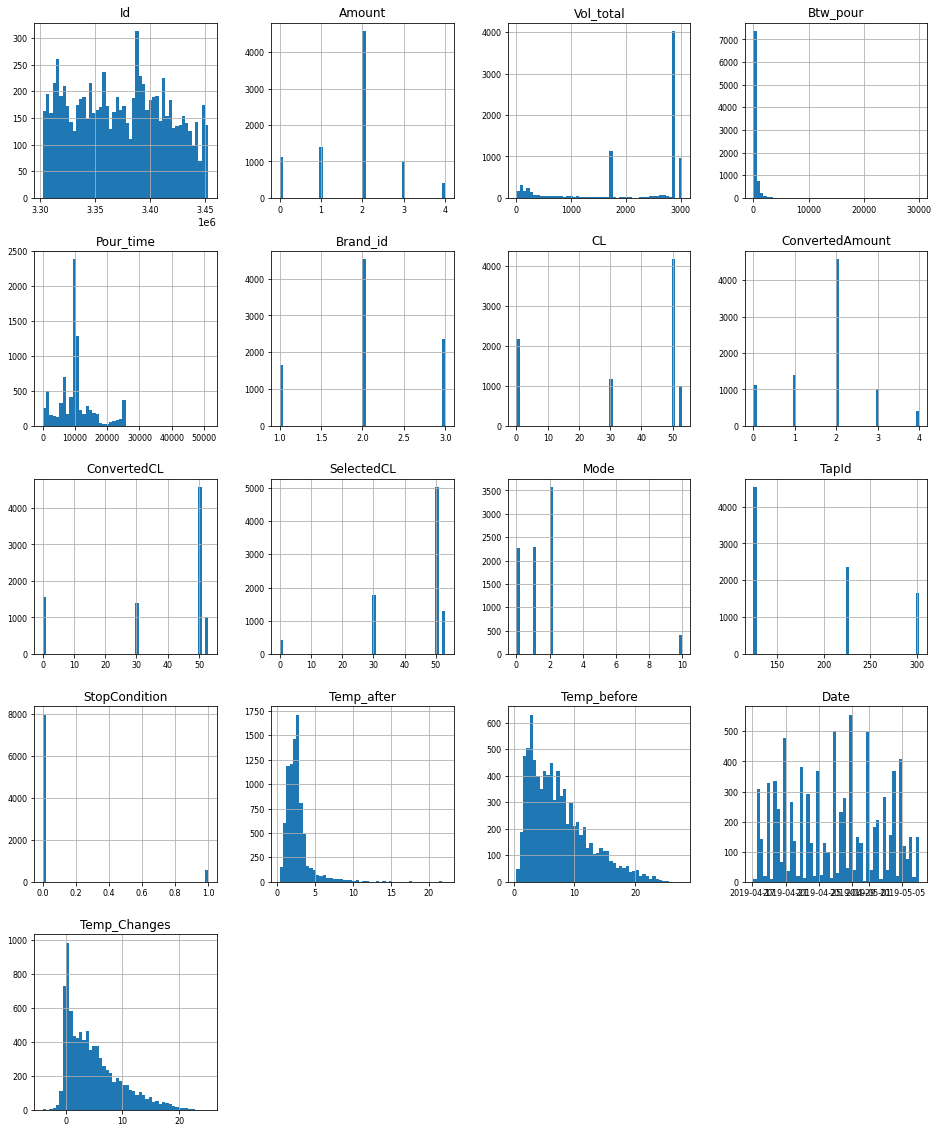

In [39]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);